In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('CaseStudy_20190517.xlsx')

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,...,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,10009,1.0,1.0
2,17423675,5.010635,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.5,Real Bed,strict,True,...,2016-11-18,33.875862,-118.403293,Sand Section Beach Bungalow,Hermosa Beach,29,97.0,90254,2.0,2.0
3,14066228,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",2,1.0,Real Bed,flexible,True,...,NaT,33.813228,-118.389434,Beach Pad 1 min walk to the ocean!,Torrance,0,NaN,90277,1.0,1.0
4,583490,4.955827,Apartment,Entire home/apt,"{Kitchen,Heating,""Smoke detector"",""Carbon mono...",2,1.0,Real Bed,strict,True,...,2017-04-06,33.778526,-118.145926,VINTAGE 1930s Mediteranian Apt. (NOT a party S...,NaN,2,100.0,90804,1.0,1.0


In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds'],
      dtype='object')

In [35]:
df.describe()

,id,log_price,accommodates,bathrooms,host_has_profile_pic,latitude,longitude,number_of_reviews,bedrooms,beds,...,keyword_cozy_present,keyword_luxury_present,location_cluster,property_type_Apartment,property_type_House,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,number_of_amenities,accommodates_times_bedrooms
count,3.679500e+04,36795.000000,36795.000000,36657.000000,36668.000000,36795.000000,36795.000000,36795.000000,36740.000000,36723.000000,...,36795.000000,36795.000000,36795.000000,36795.000000,36795.000000,36795.000000,36795.000000,36795.000000,36795.000000,36740.000000
mean,1.127511e+07,4.733284,2.955646,1.209837,0.997136,38.211040,-90.712380,17.582824,1.233451,1.624758,...,0.150428,0.043702,1.185650,0.765430,0.234570,0.540073,0.431227,0.028700,16.493002,4.858547
std,6.080011e+06,0.683231,2.011691,0.565951,0.053436,3.235813,21.515337,32.214825,0.825185,1.167209,...,0.357495,0.204433,0.782111,0.423735,0.423735,0.498398,0.495254,0.166963,6.572766,8.515960
min,3.440000e+02,2.302585,1.000000,0.000000,0.000000,33.339002,-118.905839,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.276656e+06,4.248495,2.000000,1.000000,1.000000,34.094773,-118.310291,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2.000000
50%,1.227296e+07,4.653960,2.000000,1.000000,1.000000,40.685334,-73.988211,5.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16.000000,2.000000
75%,1.641334e+07,5.164786,4.000000,1.000000,1.000000,40.736370,-73.952116,19.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,4.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,40.909174,-73.720787,400.000000,10.000000,16.000000,...,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,160.000000


In [38]:
corr_df = df.corr().T

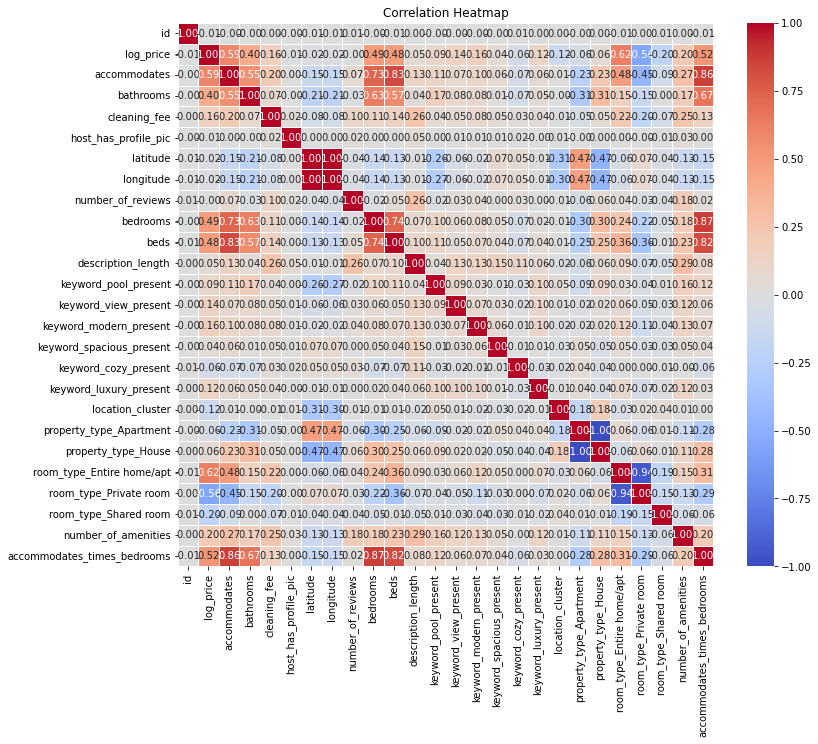

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,36795.0,1.127511e+07,6.080011e+06,344.000000,6.276656e+06,1.227296e+07,1.641334e+07,2.123090e+07
log_price,36795.0,4.733284e+00,6.832313e-01,2.302585,4.248495e+00,4.653960e+00,5.164786e+00,7.600402e+00
accommodates,36795.0,2.955646e+00,2.011691e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,36657.0,1.209837e+00,5.659509e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
host_has_profile_pic,36668.0,9.971365e-01,5.343604e-02,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
latitude,36795.0,3.821104e+01,3.235813e+00,33.339002,3.409477e+01,4.068533e+01,4.073637e+01,4.090917e+01
longitude,36795.0,-9.071238e+01,2.151534e+01,-118.905839,-1.183103e+02,-7.398821e+01,-7.395212e+01,-7.372079e+01
number_of_reviews,36795.0,1.758282e+01,3.221483e+01,0.000000,1.000000e+00,5.000000e+00,1.900000e+01,4.000000e+02
bedrooms,36740.0,1.233451e+00,8.251848e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,36723.0,1.624758e+00,1.167209e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01


In [5]:
df.isnull().sum()

id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 138
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                21
first_review             8231
host_has_profile_pic      127
host_response_rate      11128
host_since                127
instant_bookable            0
last_review              8206
latitude                    0
longitude                   0
name                        1
neighbourhood            3281
number_of_reviews           0
review_scores_rating     8715
zipcode                   524
bedrooms                   55
beds                       72
dtype: int64

In [6]:
df['first_review'].isnull().sum()

8231

In [7]:
df['description']

0        Beautiful, sunlit brownstone 1-bedroom in the ...
1        This is a bright bedroom in an historic buildi...
2        A 1044 sq. ft., 1950's beach house. 3 Blocks f...
3        Newly furnished room in beach apartment one st...
4        This apartment is charming and wonderful. Beau...
                               ...                        
36790    This apartment fosters mid-century modernism s...
36791    A great comfortable bedroom available in the h...
36792    Perfect for 1 person, will accept couples at a...
36793                            one room in bushwick apt 
36794    Located on the Pacific Coast Highway, this apa...
Name: description, Length: 36795, dtype: object

In [8]:
df['first_review']

0       2016-06-18
1       2013-04-28
2       2015-07-02
3              NaT
4       2017-03-25
           ...    
36790   2016-08-01
36791   2016-03-26
36792   2016-03-25
36793          NaT
36794   2016-08-15
Name: first_review, Length: 36795, dtype: datetime64[ns]

In [9]:
df['host_has_profile_pic'].isnull().sum()

127

In [10]:
df['host_response_rate'].isnull().sum()

11128

In [11]:
df['host_since']

0       2012-03-26
1       2013-03-27
2       2015-06-11
3       2016-05-10
4       2012-11-20
           ...    
36790   2012-02-16
36791   2014-04-01
36792   2015-03-18
36793   2013-03-24
36794   2016-05-03
Name: host_since, Length: 36795, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36795 entries, 0 to 36794
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36795 non-null  int64         
 1   log_price             36795 non-null  float64       
 2   property_type         36795 non-null  object        
 3   room_type             36795 non-null  object        
 4   amenities             36795 non-null  object        
 5   accommodates          36795 non-null  int64         
 6   bathrooms             36657 non-null  float64       
 7   bed_type              36795 non-null  object        
 8   cancellation_policy   36795 non-null  object        
 9   cleaning_fee          36795 non-null  bool          
 10  city                  36795 non-null  object        
 11  description           36774 non-null  object        
 12  first_review          28564 non-null  datetime64[ns]
 13  host_has_profile

In [13]:
df.shape

(36795, 27)

In [14]:
df.drop(['host_response_rate', 'first_review', 'last_review', 'review_scores_rating'], axis=1, inplace=True)

In [15]:
!pip install geopy


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer


In [17]:
# Let's create a copy of the DataFrame to preserve the original data
df_features = df.copy()

In [18]:
df_features['description_length'] = df_features['description'].fillna('').apply(lambda x: len(x))

In [19]:
df_features['description_length']

0         211
1        1000
2        1000
3         323
4        1002
         ... 
36790    1000
36791     188
36792    1000
36793      25
36794     302
Name: description_length, Length: 36795, dtype: int64

In [20]:
# Keyword Frequency
keywords = ['pool', 'view', 'modern', 'spacious', 'cozy', 'luxury']
for keyword in keywords:
    df_features[f'keyword_{keyword}_present'] = df_features['description'].fillna('').apply(lambda x: 1 if (isinstance(x, str) and keyword in x.lower()) else 0)


In [21]:
# 2. Temporal Features
# Time since first review
df_features['host_since'] = pd.to_datetime(df_features['host_since'])




In [22]:
# Clustering based on geographical coordinates (K-means clustering)
coordinates = df_features[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df_features['location_cluster'] = kmeans.fit_predict(coordinates)

In [23]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
# 5. Property Type and Room Type Encoding
property_type_encoder = OneHotEncoder(sparse=False)
room_type_encoder = OneHotEncoder(sparse=False)

property_types_encoded = property_type_encoder.fit_transform(df_features[['property_type']])
room_types_encoded = room_type_encoder.fit_transform(df_features[['room_type']])

property_type_labels = property_type_encoder.get_feature_names_out(input_features=['property_type'])
room_type_labels = room_type_encoder.get_feature_names_out(input_features=['room_type'])

# Add the one-hot encoded features to the DataFrame
df_features[property_type_labels] = pd.DataFrame(property_types_encoded, columns=property_type_labels, index=df_features.index)
df_features[room_type_labels] = pd.DataFrame(room_types_encoded, columns=room_type_labels, index=df_features.index)


In [46]:
property_types_encoded

(36795, 2)

In [47]:
property_type_labels

array(['property_type_Apartment', 'property_type_House'], dtype=object)

In [48]:
df_features[property_type_labels]

,property_type_Apartment,property_type_House
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
36790,1.0,0.0
36791,1.0,0.0
36792,0.0,1.0
36793,1.0,0.0


In [25]:
# 7. Amenities-based Features
# Number of amenities
df_features['number_of_amenities'] = df_features['amenities'].apply(lambda x: len(x.split(',')))


In [26]:
# 8. Combining Features
# Interaction term: 'accommodates' * 'bedrooms'
df_features['accommodates_times_bedrooms'] = df_features['accommodates'] * df_features['bedrooms']


In [27]:
# Display the updated DataFrame with engineered features
print(df_features.head())


         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   5578513   4.605170     Apartment     Private room   
2  17423675   5.010635         House  Entire home/apt   
3  14066228   4.248495     Apartment     Private room   
4    583490   4.955827     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {Internet,"Wireless Internet","Air conditionin...             2        1.0   
2  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.5   
3  {TV,Internet,"Wireless Internet",Kitchen,"Free...             2        1.0   
4  {Kitchen,Heating,"Smoke detector","Carbon mono...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ... keyword_cozy_present  \
0  Real Bed              strict          True  ...                    0   
1  Real Bed         

In [28]:
df = df_features.copy()


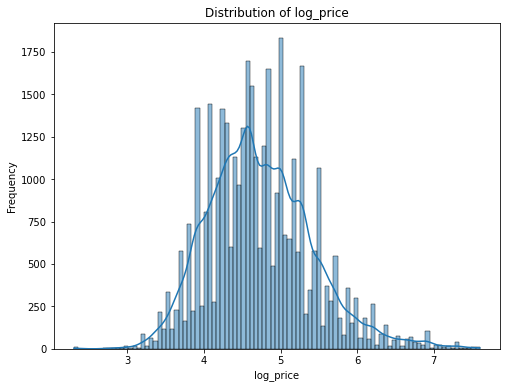

In [29]:
# 1. Data Exploration and Visualization
# Distribution of the target variable 'log_price'
plt.figure(figsize=(8, 6))
sns.histplot(df['log_price'], kde=True)
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.title('Distribution of log_price')
plt.show()

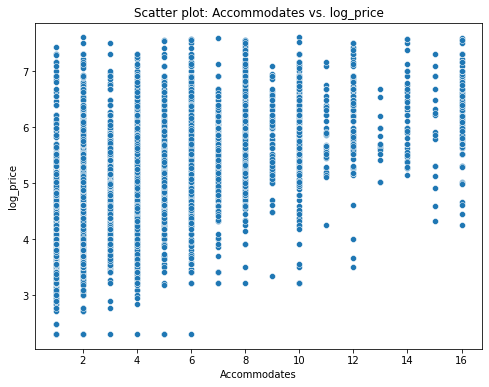

In [30]:
# Scatter plot: 'accommodates' vs. 'log_price'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='accommodates', y='log_price')
plt.xlabel('Accommodates')
plt.ylabel('log_price')
plt.title('Scatter plot: Accommodates vs. log_price')
plt.show()

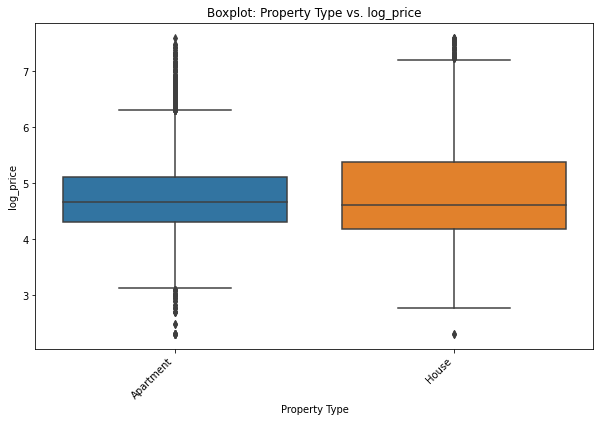

In [31]:
# Boxplot: 'property_type' vs. 'log_price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='property_type', y='log_price')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Property Type')
plt.ylabel('log_price')
plt.title('Boxplot: Property Type vs. log_price')
plt.show()

In [32]:
# Comparison with numerical features using scatter plots
numerical_features = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']


In [33]:
# Comparison with categorical features using boxplots
categorical_features = ['bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'instant_bookable']


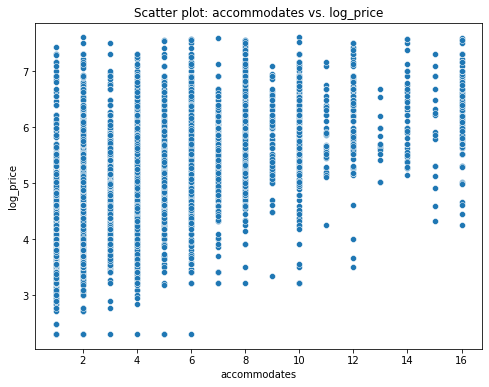

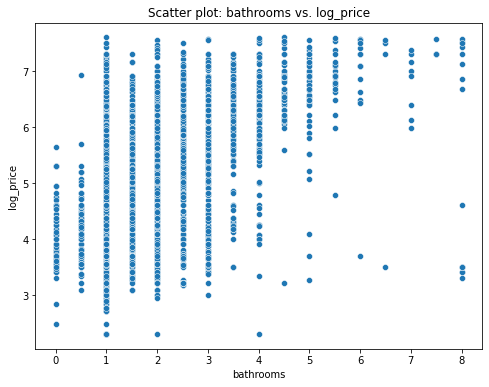

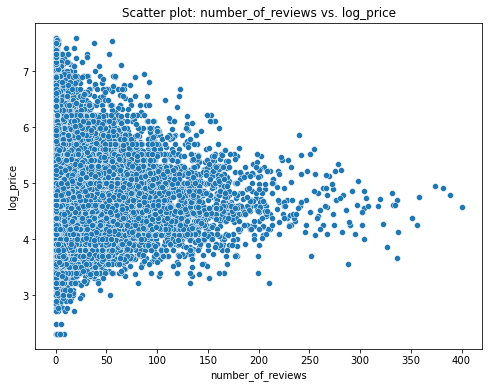

ValueError: Could not interpret value `review_scores_rating` for parameter `x`

<Figure size 576x432 with 0 Axes>

In [34]:

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='log_price')
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(f'Scatter plot: {feature} vs. log_price')
    plt.show()


In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='log_price')
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(f'Boxplot: {feature} vs. log_price')
    plt.xticks(rotation=45, ha='right')
    plt.show()



In [ ]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = df_features.copy()

In [ ]:
# Separate the target variable 'log_price' from the features
x = df.drop(['log_price', 'description'], axis=1)
y = df['log_price']


In [ ]:
x.head()

In [ ]:
x.columns

In [ ]:
x.shape

In [ ]:
x.info()

In [ ]:
x.isnull().sum()

In [ ]:
x.fillna(x.mean(), inplace=True)


In [ ]:
x.isnull().sum()

In [ ]:
x['neighbourhood']

In [ ]:
x['neighbourhood'] = x['neighbourhood'].fillna(x['neighbourhood'].mode()[0])

In [ ]:
x['zipcode']

In [ ]:
# 3. Imputation with a specific value for zipcode (assuming it's a string type feature)
x['zipcode'] = x['zipcode'].fillna('Unknown')

In [ ]:
x['host_since']

In [ ]:
x['host_since'] = x['host_since'].fillna(x['host_since'].mode()[0])

In [ ]:
x.isnull().sum()

In [ ]:
x['name'] = x['name'].fillna('Unknown')

In [ ]:
x['name'].isnull().sum()

In [ ]:
categorical_features

In [ ]:
numerical_features

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming x_train and x_test are your feature matrices containing the data.

# Identify the categorical columns to be one-hot encoded
categorical_features = ['bed_type', 'cancellation_policy', 'city', 'host_has_profile_pic', 'instant_bookable']

# Create a column transformer to handle both numerical and categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'  # Pass through any remaining numerical columns as-is
)

# Fit and transform the column transformer on the training data
x_train_encoded = column_transformer.fit_transform(x_train)

# Transform the test data using the fitted column transformer
x_test_encoded = column_transformer.transform(x_test)

# Convert x_train_encoded and x_test_encoded back to DataFrames
x_train_encoded = pd.DataFrame(x_train_encoded)
x_test_encoded = pd.DataFrame(x_test_encoded)

In [ ]:
# List of regression models to compare
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR(kernel='linear'),
    XGBRegressor(random_state=42)
]


In [ ]:
model_results = {}
for model in models:
    model_name = model.__class__.__name__
    model.fit(x_train_encoded, y_train)
    y_pred = model.predict(x_test_encoded)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[model_name] = {'MSE': mse, 'R2': r2}

In [ ]:

# Display the results
print("Model Evaluation:")
for model_name, metrics in model_results.items():
    print(f"{model_name}:")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f"R-squared (R2): {metrics['R2']:.4f}")
    print("-----------------------")

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=[metrics['MSE'] for metrics in model_results.values()])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models (MSE)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=[metrics['R2'] for metrics in model_results.values()])
plt.xlabel('Regression Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of Regression Models (R2)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=[metrics['MSE'] for metrics in model_results.values()])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models (MSE)')
plt.xticks(rotation=45, ha='right')
plt.show()




In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=[metrics['R2'] for metrics in model_results.values()])
plt.xlabel('Regression Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of Regression Models (R2)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded the dataset into a DataFrame named 'df_features'
# Let's create a copy of the DataFrame to preserve the original data
df = df_features.copy()

# Separate the target variable 'log_price' from the features
x = df.drop(['log_price', 'description'], axis=1)
y = df['log_price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(50, 200, 10),          # Number of boosting rounds
    'max_depth': np.arange(3, 11),                   # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],    # Step size shrinkage
    'subsample': [0.7, 0.8, 0.9, 1.0],               # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]         # Subsample ratio of features when constructing each tree
}


In [ ]:

# Create the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42)
random_search.fit(x_train, y_train)

# Get the best hyperparameters from RandomizedSearchCV
best_params = random_search.best_params_

# Train the XGBoost Regressor with the best hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(x_train, y_train)

# Predict the 'log_price' on the test set using the best model
y_pred = best_xgb_model.predict(x_test)

# Evaluate the best model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


# Using cross validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded the dataset into a DataFrame named 'df_features'
# Let's create a copy of the DataFrame to preserve the original data
df = df_features.copy()

# Separate the target variable 'log_price' from the features
X = df.drop(['log_price', 'description'], axis=1)
y = df['log_price']

# Split the data into training and testing sets (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(50, 200, 10),          # Number of boosting rounds
    'max_depth': np.arange(3, 11),                   # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],    # Step size shrinkage
    'subsample': [0.7, 0.8, 0.9, 1.0],               # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]         # Subsample ratio of features when constructing each tree
}

# Create the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning with k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=kfold, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters from RandomizedSearchCV
best_params = random_search.best_params_

# Train the XGBoost Regressor with the best hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predict the 'log_price' on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Evaluate the best model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Evaluation (with Cross-validation):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


# Explore the key drivers of the target variable, feature engineering and insight creation

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 6))
sns.histplot(df['log_price'], kde=True)
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.title('Distribution of log_price')
plt.show()


In [ ]:
# Scatter plot for numerical features vs. 'log_price'
numerical_features = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='log_price')
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(f'Scatter plot: {feature} vs. log_price')
    plt.show()

In [ ]:
# Boxplot for categorical features vs. 'log_price'
categorical_features = ['bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'instant_bookable']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='log_price')
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(f'Boxplot: {feature} vs. log_price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
#Feature Importance using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

x = df.drop(['log_price', 'description'], axis=1)
y = df['log_price']

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x, y)

In [ ]:
importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.index, y=importance.values)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Random Forest Regressor')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
categorical_features

['bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'instant_bookable']

In [43]:
numerical_features

['accommodates',
 'bathrooms',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']